In [2]:
import snntorch as snn
import torch

# Training Parameters
batch_size=128
data_path='/data/mnist'
num_classes = 10  # MNIST has 10 output classes

# Torch Variables
dtype = torch.float

In [7]:
from torchvision import datasets, transforms

# Define a transform
transform = transforms.Compose([
            transforms.Resize((28,28)),
            transforms.Grayscale(),
            transforms.ToTensor(),
            transforms.Normalize((0,), (1,))])

mnist_train = datasets.MNIST(data_path, train=True, download=True, transform=transform)

In [8]:
from snntorch import utils

subset = 10
mnist_train = utils.data_subset(mnist_train, subset)

from torch.utils.data import DataLoader

train_loader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True)

In [28]:
from snntorch import spikegen

num_steps=100

# Iterate through minibatches
data = iter(train_loader)
data_it, targets_it = next(data)

# Spiking Data
spike_data = spikegen.rate(data_it, num_steps=num_steps, gain=0.25)

print(spike_data.size())

torch.Size([100, 128, 1, 28, 28])


torch.Size([100, 28, 28])


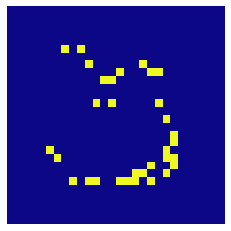

In [29]:
import matplotlib.pyplot as plt
import snntorch.spikeplot as splt
from IPython.display import HTML

spike_data_sample = spike_data[:, 0, 0]
print(spike_data_sample.size())

fig, ax = plt.subplots()
anim = splt.animator(spike_data_sample, fig, ax)
#plt.rcParams['animation.ffmpeg_path'] = '/home/karthik/sim_clean/ece_594bb/ece594bb_pl-proj/ffmpeg.exe'
#HTML(anim.to_html5_video())
#anim.save("spike_mnist_test.mp4")